## 一、鸢尾花数据集

In [1]:
# 加载数据集
from sklearn.datasets import load_iris
iris = load_iris()

In [2]:
# 将数据集拆分为训练集和测试集
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.3, random_state=55)


In [3]:
# 标准化
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [4]:
%%time
# 训练模型gd
from LogisticRegression import LogisticRegression
model_with_gd = LogisticRegression()
model_with_gd.fit_with_gd(X_train, y_train)


训练完成
CPU times: user 765 ms, sys: 34.2 ms, total: 799 ms
Wall time: 1.04 s


可视化训练结果：

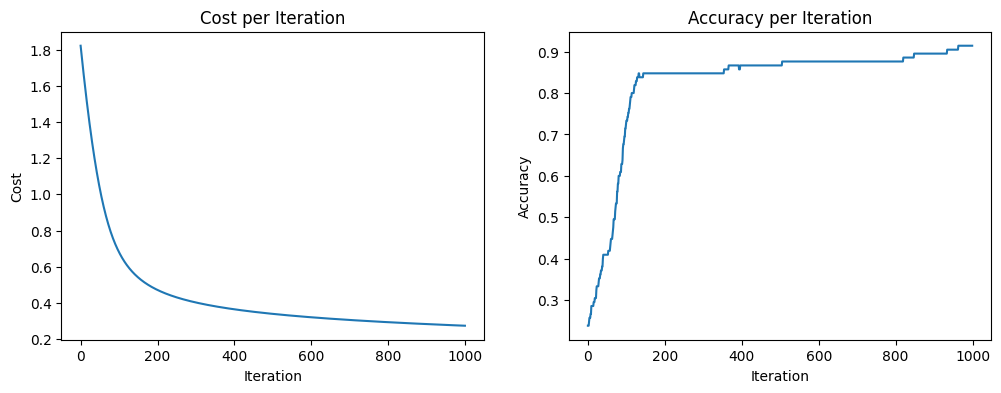

In [5]:
model_with_gd.visullize()

In [6]:
%%time
# 训练模型sgd
model_with_sgd = LogisticRegression()
model_with_sgd.fit_with_sgd(X_train,y_train)

CPU times: user 2.35 ms, sys: 176 µs, total: 2.52 ms
Wall time: 1.8 ms


- 用梯度下降的模型

In [7]:
# 预测
y_pred = model_with_gd.predict(X_test)
# 计算预测准确率
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

Accuracy: 0.8444444444444444


- 用随机梯度下降的模型

In [8]:

# 预测
y_pred = model_with_sgd.predict(X_test)
# 计算预测准确率
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)


Accuracy: 0.7555555555555555


## 二、西瓜数据集(3.0)

In [9]:
def createDataSet():
    """
    创建测试的数据集，里面的数值中具有连续值
    :return:
    """
    dataSet = [
        # 1
        ['青绿', '蜷缩', '浊响', '清晰', '凹陷', '硬滑', 0.697, 0.460, '好瓜'],
        # 2
        ['乌黑', '蜷缩', '沉闷', '清晰', '凹陷', '硬滑', 0.774, 0.376, '好瓜'],
        # 3
        ['乌黑', '蜷缩', '浊响', '清晰', '凹陷', '硬滑', 0.634, 0.264, '好瓜'],
        # 4
        ['青绿', '蜷缩', '沉闷', '清晰', '凹陷', '硬滑', 0.608, 0.318, '好瓜'],
        # 5
        ['浅白', '蜷缩', '浊响', '清晰', '凹陷', '硬滑', 0.556, 0.215, '好瓜'],
        # 6
        ['青绿', '稍蜷', '浊响', '清晰', '稍凹', '软粘', 0.403, 0.237, '好瓜'],
        # 7
        ['乌黑', '稍蜷', '浊响', '稍糊', '稍凹', '软粘', 0.481, 0.149, '好瓜'],
        # 8
        ['乌黑', '稍蜷', '浊响', '清晰', '稍凹', '硬滑', 0.437, 0.211, '好瓜'],

        # ----------------------------------------------------
        # 9
        ['乌黑', '稍蜷', '沉闷', '稍糊', '稍凹', '硬滑', 0.666, 0.091, '坏瓜'],
        # 10
        ['青绿', '硬挺', '清脆', '清晰', '平坦', '软粘', 0.243, 0.267, '坏瓜'],
        # 11
        ['浅白', '硬挺', '清脆', '模糊', '平坦', '硬滑', 0.245, 0.057, '坏瓜'],
        # 12
        ['浅白', '蜷缩', '浊响', '模糊', '平坦', '软粘', 0.343, 0.099, '坏瓜'],
        # 13
        ['青绿', '稍蜷', '浊响', '稍糊', '凹陷', '硬滑', 0.639, 0.161, '坏瓜'],
        # 14
        ['浅白', '稍蜷', '沉闷', '稍糊', '凹陷', '硬滑', 0.657, 0.198, '坏瓜'],
        # 15
        ['乌黑', '稍蜷', '浊响', '清晰', '稍凹', '软粘', 0.360, 0.370, '坏瓜'],
        # 16
        ['浅白', '蜷缩', '浊响', '模糊', '平坦', '硬滑', 0.593, 0.042, '坏瓜'],
        # 17
        ['青绿', '蜷缩', '沉闷', '稍糊', '稍凹', '硬滑', 0.719, 0.103, '坏瓜']
    ]

    # 特征值列表
    labels = ['色泽', '根蒂', '敲击', '纹理', '脐部', '触感', '密度', '含糖率']

    # 特征对应的所有可能的情况
    labels_full = {}

    for i in range(len(labels)):
        labelList = [example[i] for example in dataSet]
        uniqueLabel = set(labelList)
        labels_full[labels[i]] = uniqueLabel

    return dataSet, labels, labels_full

In [10]:
import pandas as pd
dataSet, labels, labels_full = createDataSet()
X = pd.DataFrame(dataSet).iloc[:,:-1]
y = pd.DataFrame(dataSet).iloc[:,-1]


In [11]:
# 将其中的离散数据进行标签编码
from sklearn.preprocessing import LabelEncoder
le =LabelEncoder()
for i in range(6):
    X[i] = le.fit_transform(X[i])
y = le.fit_transform(y)

In [64]:
# 将数据集拆分为训练集和测试集
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.6, random_state=55)


In [39]:
# 标准化
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [40]:
# 训练模型gd
from LogisticRegression import LogisticRegression
model_with_gd = LogisticRegression()
model_with_gd.fit_with_gd(X_train, y_train)

训练完成


可视化训练过程

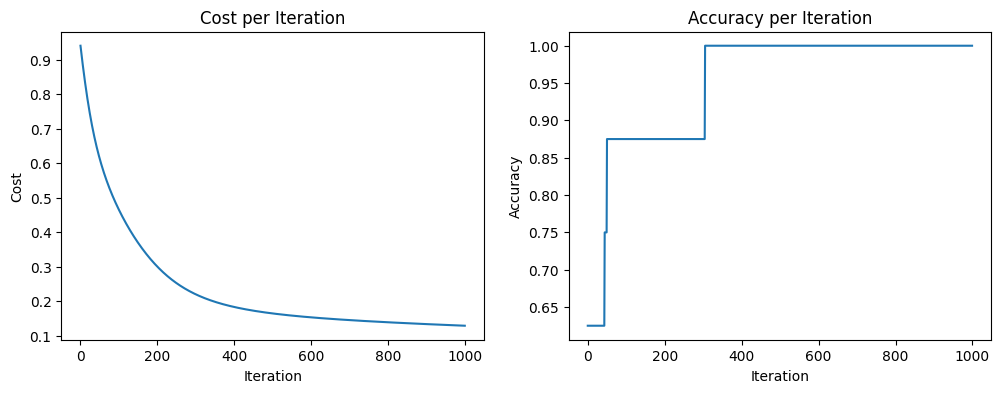

In [41]:
model_with_gd.visullize()

In [66]:
# 预测
y_pred = model_with_gd.predict(X_test)
# 计算预测准确率
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

Accuracy: 0.78555555
